In [2]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import operator as op
client_base = pymongo.MongoClient(f'mongodb://localhost:27017')
mydb_base = client_base.get_database("toxic_games")

collection_base = mydb_base.get_collection("games")

In [3]:
annotators = mydb_base.get_collection("annotators")

In [4]:
def generate_box_plot(df, column_name, title="Boxplot"):
    plotdf = df[column_name]
    #print(plotdf)
    #plotdf = plotdf.melt(id_vars=['A102'], value_vars=column_name)
    #print(plotdf)
    #exit()
    sns.set_theme(style="ticks", palette="pastel")

    # Load the example tips dataset
    tips = sns.load_dataset("tips")

    # Draw a nested boxplot to show bills by day and time
    #sns.boxplot(data=plotdf).set_title(title)
    sns.boxplot(data=plotdf).set_title(title)
    sns.despine(offset=10, trim=True)
    plt.show()

In [5]:
annotations = {
    'NEUTRAL': [],
    'SLIGHTLY_TOXIC': [],
    'TOXIC': [],
    'EXTREMELY_TOXIC': [],
    'N_A': []
}
for match in collection_base.find({"type": "random", "problem": {"$exists": False}}):
    if "annotation" not in match:
        continue
    score = match["detoxify-original-average"]
    for annotation in match["annotation"]:
      annotations[annotation].append(score)

In [6]:
x = [0 for i in range(len(annotations['NEUTRAL']))]
x.extend([1 for i in range(len(annotations['SLIGHTLY_TOXIC']))])
x.extend([2 for i in range(len(annotations['TOXIC']))])
x.extend([3 for i in range(len(annotations['EXTREMELY_TOXIC']))])
y = annotations["NEUTRAL"]
y.extend(annotations['SLIGHTLY_TOXIC'])
y.extend(annotations['TOXIC'])
y.extend(annotations['EXTREMELY_TOXIC'])
np.corrcoef(x,y)

array([[1.        , 0.35602896],
       [0.35602896, 1.        ]])

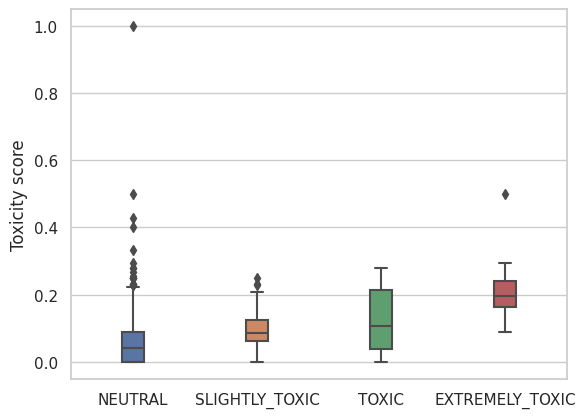

In [7]:
annotation_data ={
    'NEUTRAL': annotations["NEUTRAL"],
    'SLIGHTLY_TOXIC': annotations["SLIGHTLY_TOXIC"],
    'TOXIC': annotations["TOXIC"],
    'EXTREMELY_TOXIC': annotations["EXTREMELY_TOXIC"],
}
def sort(item):
    if item[0] == 'NEUTRAL':
        return 0
    elif item[0] == 'SLIGHTLY_TOXIC':
        return 1
    elif item[0] == 'TOXIC':
        return 2
    elif item[0] == 'EXTREMELY_TOXIC':
        return 3
      

sorted_keys, sorted_vals = zip(*sorted(annotation_data.items(), key=sort))

# almost verbatim from question
sns.set(context='notebook', style='whitegrid')
#sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.18)
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

# category labels
plt.xticks(plt.xticks()[0], sorted_keys)
plt.ylabel("Toxicity score")
plt.show()

In [8]:
(np.array(annotation_data["NEUTRAL"]) > 0.2).sum()/len(annotation_data["NEUTRAL"])

0.044189852700491

In [9]:
len(annotation_data["NEUTRAL"])

611

In [10]:
print("Neutral", len(annotation_data["NEUTRAL"]), "Slightly_TOXIC", len(annotation_data["SLIGHTLY_TOXIC"]), "TOXIC", len(annotation_data["TOXIC"]), "EXTREMELY TOXIC", len(annotation_data["EXTREMELY_TOXIC"]))

Neutral 611 Slightly_TOXIC 79 TOXIC 25 EXTREMELY TOXIC 10


In [11]:
get_score = {
    "NEUTRAL": 0,
    "SLIGHTLY_TOXIC": 1,
    "TOXIC": 2,
    "EXTREMELY_TOXIC": 3 
}

In [12]:
total_double = 0
disagreement_score = 0
total_disagreement = 0
neutral_disagreement = 0
slightly_disagreement = 0
toxic_disagreement = 0
for match in collection_base.find({"problem": {"$exists": False}}):
    if "annotation" not in match or len(match["annotation"]) <= 1:
        continue
    score = match["detoxify-original-average"]

    if match["annotation"][0] == "N_A" or match["annotation"][1] == "N_A":
        continue
    total_double += 1
    if match["annotation"][0] != match["annotation"][1]:
        print(match["annotation"][0], match["annotation"][1])
        if match["annotation"][0] == "NEUTRAL" or match["annotation"][1] == "NEUTRAL":
            neutral_disagreement += 1
        if match["annotation"][0] == "SLIGHTLY_TOXIC" or match["annotation"][1] == "SLIGHTLY_TOXIC":
            slightly_disagreement += 1
        if match["annotation"][0] == "TOXIC" or match["annotation"][1] == "TOXIC":
            toxic_disagreement += 1
        total_disagreement += 1
        disagreement_score += np.abs(get_score[match["annotation"][0]] - get_score[match["annotation"][1]])
      #annotations[annotation].append(score)

SLIGHTLY_TOXIC TOXIC
SLIGHTLY_TOXIC NEUTRAL
SLIGHTLY_TOXIC NEUTRAL
NEUTRAL SLIGHTLY_TOXIC
NEUTRAL TOXIC
SLIGHTLY_TOXIC TOXIC
TOXIC SLIGHTLY_TOXIC
SLIGHTLY_TOXIC NEUTRAL
SLIGHTLY_TOXIC TOXIC
SLIGHTLY_TOXIC NEUTRAL
SLIGHTLY_TOXIC NEUTRAL
SLIGHTLY_TOXIC NEUTRAL
TOXIC SLIGHTLY_TOXIC
SLIGHTLY_TOXIC NEUTRAL
SLIGHTLY_TOXIC NEUTRAL
SLIGHTLY_TOXIC EXTREMELY_TOXIC
SLIGHTLY_TOXIC NEUTRAL
SLIGHTLY_TOXIC TOXIC
NEUTRAL SLIGHTLY_TOXIC
NEUTRAL TOXIC
NEUTRAL SLIGHTLY_TOXIC
SLIGHTLY_TOXIC NEUTRAL
NEUTRAL SLIGHTLY_TOXIC
SLIGHTLY_TOXIC NEUTRAL
NEUTRAL SLIGHTLY_TOXIC
NEUTRAL SLIGHTLY_TOXIC
SLIGHTLY_TOXIC NEUTRAL
SLIGHTLY_TOXIC TOXIC
SLIGHTLY_TOXIC TOXIC
SLIGHTLY_TOXIC NEUTRAL
SLIGHTLY_TOXIC NEUTRAL
NEUTRAL SLIGHTLY_TOXIC
TOXIC SLIGHTLY_TOXIC
NEUTRAL SLIGHTLY_TOXIC


In [13]:
print("Score", disagreement_score, "Total", total_disagreement, "NEUTRAL", neutral_disagreement, "SLIGHTLY", slightly_disagreement, "TOXIC", toxic_disagreement)

Score 37 Total 34 NEUTRAL 24 SLIGHTLY 32 TOXIC 11


In [14]:
print(total_double)

126


In [15]:
with open("data/data_online-toxicity_2023-08-08_21-41.csv", encoding='utf-16') as f:
    df = pd.read_csv(f, sep='\t', encoding='utf-16', header=0, skiprows=[1])

In [16]:
df

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,A001_01,A101,A102,A103_01,...,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
0,44,NaN,NaN,base,interview,2023-08-02 15:39:21,Annotator2,1,1,170.0,...,NaN,2023-08-02 15:46:32,1,0,7,7,0,0,1.37,23
1,45,NaN,NaN,base,interview,2023-08-02 15:41:54,Annotator3,1,1,160.0,...,NaN,2023-08-02 15:45:33,1,0,7,7,0,0,1.98,56
2,47,NaN,NaN,base,interview,2023-08-02 16:39:03,Annotator6,1,1,150.0,...,NaN,2023-08-02 16:43:57,1,0,7,7,0,0,0.88,4
3,49,NaN,NaN,base,interview,2023-08-02 16:42:34,Annotator5,1,1,112.0,...,NaN,2023-08-02 16:54:54,1,0,7,7,0,0,1.57,39
4,50,NaN,NaN,base,interview,2023-08-02 18:35:10,Annotator7,1,1,70.0,...,NaN,2023-08-02 18:52:04,1,0,7,7,0,0,1.63,49
5,54,NaN,NaN,base,interview,2023-08-04 20:06:19,Annotator8,1,1,1.0,...,NaN,2023-08-04 20:13:34,1,0,7,7,0,0,0.73,5
6,55,NaN,NaN,base,interview,2023-08-04 20:33:01,Annotator9,1,1,60.0,...,NaN,2023-08-04 20:54:36,1,0,7,7,0,0,0.35,0
7,58,NaN,NaN,base,interview,2023-08-05 01:49:22,Annotator10,1,1,50.0,...,NaN,2023-08-05 01:52:07,1,0,7,7,0,0,1.54,89
8,59,NaN,NaN,base,interview,2023-08-05 12:11:10,Annotator14,1,2,60.0,...,NaN,2023-08-05 12:23:27,1,0,7,7,0,0,0.66,1
9,62,NaN,NaN,base,interview,2023-08-08 20:08:04,Annotator11,-9,1,NaN,...,NaN,2023-08-08 20:10:05,1,0,7,7,10,9,0.93,3


In [17]:
def find_name(name):
    for idx, entry in enumerate(df["A001_01"]):
        if entry == name:
            return idx
    return -1
def get_hours(idx):
    return df["A103_01"][idx] # Online A104_01



In [18]:
x_total = []
y_total = []
annotation_threshold = 30
# Get the amount of hours played and a score signifying the likelihood to annotate a match as toxic
for annotator in annotators.find({}):
    
    idx = find_name(annotator["name"])
    if idx == -1:
        continue
    
    score = 0
    count = 0
    for annotation in annotator["annotations"].values():
        if annotation["problem"]:
            continue
        if annotation["gameAnnotation"] == "N_A":
            continue
        score += get_score[annotation["gameAnnotation"]]
        count += 1
    if count < annotation_threshold:
        continue
    hours = get_hours(idx)
    if np.isnan(hours):
        hours = 0
    x_total.append(hours)

    y_total.append(score/count)


In [19]:
x_message = []
y_message = []
# Get the amount of hours played and a score signifying the likelihood to annotate a message as toxic
for annotator in annotators.find({}):
    
    idx = find_name(annotator["name"])
    if idx == -1:
        continue
    
    score = 0
    count = 0
    annotation_count = 0
    for annotation in annotator["annotations"].values():
        if annotation["problem"]:
            continue
        if annotation["gameAnnotation"] == "N_A":
            continue
        for message in annotation["messages"]:
            if message == "N_A" or message == "NEUTRAL":
                continue
            score += get_score[message]
            count += 1
        annotation_count += 1
    if annotation_count < annotation_threshold:
        continue
    hours = get_hours(idx)
    if np.isnan(hours):
        hours = 0
    x_message.append(hours)

    y_message.append(score/count)

Text(0.5, 0, 'Hours')

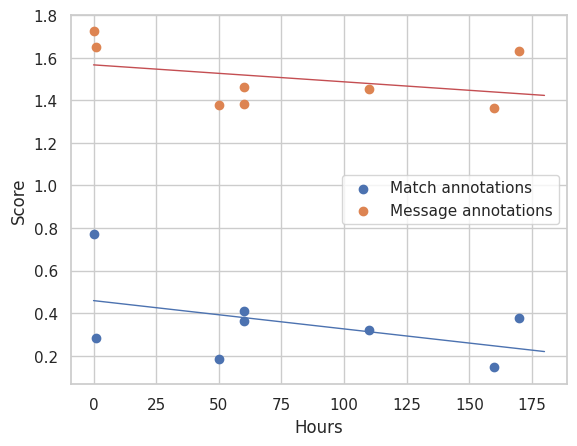

In [26]:
b, a = np.polyfit(x_total, y_total, deg=1)

xseq = np.linspace(0, 180, num=len(x_total))

# Plot regression line
plt.plot(xseq, a + b * xseq, color="b", lw=1);

b, a = np.polyfit(x_message, y_message, deg=1)

xseq = np.linspace(0, 180, num=len(x_total))

# Plot regression line
plt.plot(xseq, a + b * xseq, color="r", lw=1);

plt.scatter(x_total, y_total, label="Match annotations")
plt.scatter(x_message, y_message, label="Message annotations")
plt.legend()
plt.ylabel("Score")
plt.xlabel("Hours")


In [21]:
np.corrcoef(x_total,y_total)

array([[ 1.        , -0.45297453],
       [-0.45297453,  1.        ]])

In [22]:
np.corrcoef(x_message,y_message)

array([[ 1.        , -0.36486069],
       [-0.36486069,  1.        ]])